<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/501"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks-dev/image_matrix.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

# gg_image_matrix

`gg_image_matrix()` is an utility method helping to combine several images into one graphical object.

The displayed image grid dimensions are determined by shape of the input 2D ndarray.

Elements of the input 2D ndarray are images specified by ndarrays with shape (n, m) or (n, m, 3) or (n, m, 4).

For more details see: [image_101.ipynb](https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks-dev/image_101.ipynb)


In [54]:
import numpy as np
from lets_plot import *
load_lets_plot_js()

### Create 2 x 3 array of images

Fill array with the same image.

In [55]:
import matplotlib.image as mpimg
img=mpimg.imread('https://raw.githubusercontent.com/JetBrains/lets-plot/master/docs/examples/images/fisher_boat.png')

rows = 2
cols = 3
X = np.empty([rows, cols], dtype=object)
X.fill(img)

### Display images in 2 x 3 grid


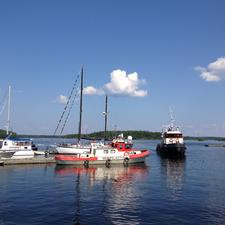
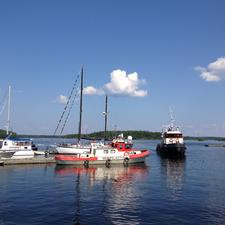
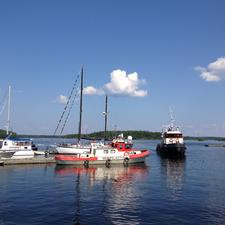
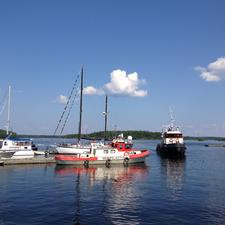
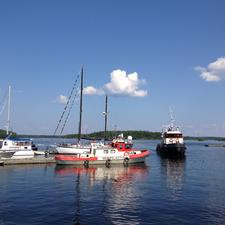
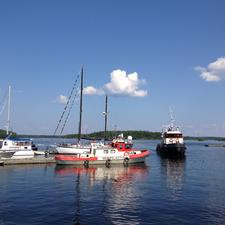

In [56]:
gg_image_matrix(X)

### Images in the grid can be of different sizes


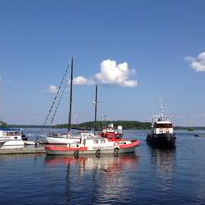
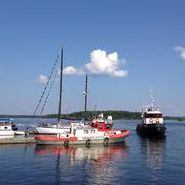
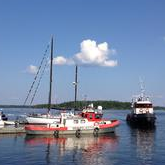
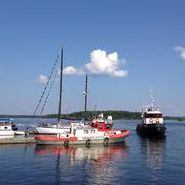
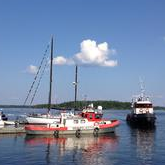
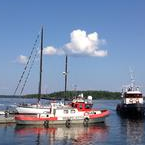

In [57]:
# Lets vary size of images in the matrix
X1 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        v = (col + row + 1) * 10
        X1[row][col] = img[v:-v,v:-v,:]

gg_image_matrix(X1)

### Normalization in gray-scale image

By default, luminosity images get normalized so that each image have values in the range [0,255].

In [58]:
# First, transform RGB image to grayscale image.
# Select only one `R` channel:
img_gs = img[:,:,0]

This function will alter the range of values in an image. 

In [59]:
def _degrade(grayscale_img:np.ndarray, v:float):
    # Drop all values less then v
    # Subtract v from all other values 
    h, w = grayscale_img.shape
    for row in range(h):
        for col in range(w):
            if grayscale_img[row][col] < v:
                grayscale_img[row][col] = 0.
            else:
                grayscale_img[row][col] -= v

Now lets fill 2D array with images applying `degrade` function on each iteration. The last image added in `degraded` the most.

In [60]:
X2 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        print('[%d][%d] input image range: [%f,%f]' % (row, col, img_gs.min(), img_gs.max()))
        X2[row][col] = img_gs
        img_gs = img_gs.copy()
        _degrade(img_gs, v=.1)



[0][0] input image range: [0.000000,1.000000]
[0][1] input image range: [0.000000,0.900000]
[0][2] input image range: [0.000000,0.800000]
[1][0] input image range: [0.000000,0.700000]
[1][1] input image range: [0.000000,0.600000]
[1][2] input image range: [0.000000,0.500000]


### Display images in grid with normalization (default)


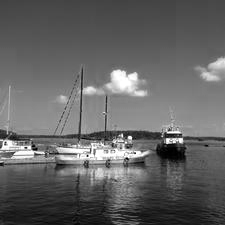
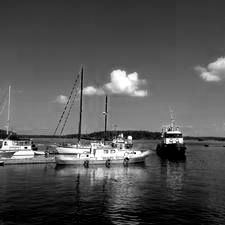
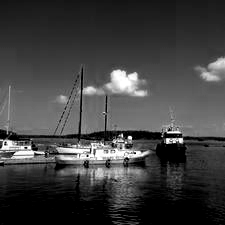
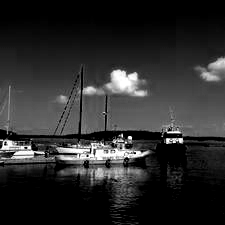
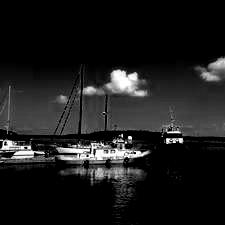
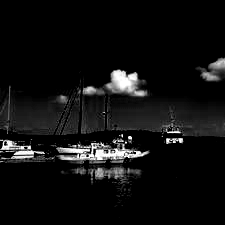

In [61]:
gg_image_matrix(X2)


### Display images in grid with NO normalization

Its important to remember that the input values are expected in range [0, 255].
In our example the values are in range [0, 1] and without normalization the image is just too dark. 


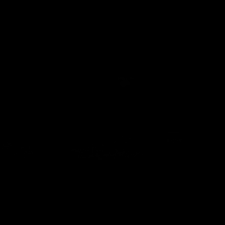

In [62]:
gg_image_matrix(X2, norm=False)

### Display images in grid with NO normalization (fixed)

To be able to see images without normalization we will first map the range [0, 1] to [0, 255] and `degrade` the images once again.

In [63]:
img_gs255 = np.vectorize(lambda v: v * 255.)(img[:,:,0])
X3 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        print('[%d][%d] input image range: [%d,%d]' % (row, col, img_gs255.min(), img_gs255.max()))
        X3[row][col] = img_gs255
        img_gs255 = img_gs255.copy()
        _degrade(img_gs255, v=30)


[0][0] input image range: [0,255]
[0][1] input image range: [0,225]
[0][2] input image range: [0,195]
[1][0] input image range: [0,165]
[1][1] input image range: [0,135]
[1][2] input image range: [0,105]



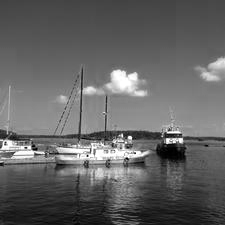
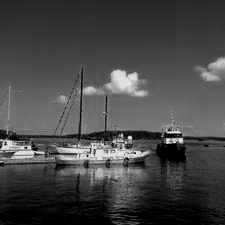
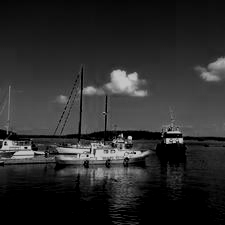
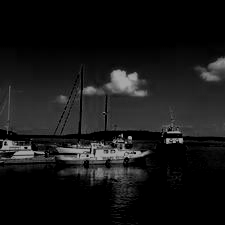
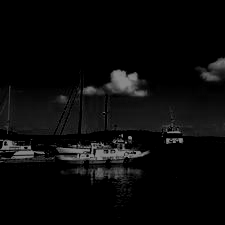
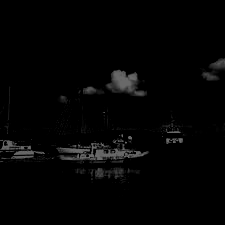

In [64]:
gg_image_matrix(X3, norm=False)